## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?

**The difference between regression and classification is that classification is when we use features to predict a categorical variable, whereas regression is when we use features to predict a numeric variable.**

2. What is a confusion table? What does it help us understand about a model's performance?

**A confusion table cross-tabulates the actual and predicted values. It allows us to understand where the model predicts class labels correctly or incorrectly.**

3. What does the SSE quantify about a particular model?

**SSE quantifies the squared error of a model's results. It provides a measure of how far off the model is from the truth/actual value.**
4. What are overfitting and underfitting?

**Overfitting is when a model is too complex for the data available, making it difficult for the model to generalize. Underfitting is when a model is too simple for the data available, and it does not capture the important features.**

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

**When splitting the data and testing the model on data that has never been seen before, we can continue to reuse the model in the future. It gives us a more accurate estimate of how th emodel will perform in novel use cases, rather than the ones that we have already seen. In other words, the model is able the generalize.**

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Class labels are simple to interpret, however, probabilities are important, as then we are able to know how accurate or certain the predictions are. A weakness is that a model can classify a class, but the probabilities are a .51/.49 split, which is a very close split.**

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?

**Class 1: Large chordate**

**Class 2: Fish**

**Class 3: Birds**

**Class 4: Miscellaneous sea creatures**

**Class 5: Bugs**

**Class 6: Reptiles**

**Class 7: Tube creatures**

2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.

**I select $k$ that maximizes accuracy.**

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

**The total number of correct predictions according to the confusion table would be 46 predictions (17+9+1+7+3+5+4), and the total number of predictions would be 51 predictions. Therefore, our accuracy would be 90%.**

**The primary mistakes in the model's predictions seem to stem from feature overlap between certain classes, particularly classes 3, 4, and 5, which share similar characteristics that lead to confusion. Insufficient training data for these classes hampers the model's ability to learn distinctive features, resulting in low correct predictions. Conversely, classes 1 and 2 exhibit clear differentiability, reflecting robust feature representation. The consistent misclassifications highlight the need for targeted improvements in feature engineering and data augmentation, as well as potential adjustments to model parameters to enhance classification accuracy across all groups.**

5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**According to the confusion table, not all of the classes are presented. While the model performs well on certain classes, the absence of probabilities for some classes indicates a failure to learn their characteristics, which could stem from issues like class imbalance, insufficient data, or model architecture. Improving performance for those classes may require further data collection, feature engineering, or tuning of the model.**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('zoo.csv')
print(df.head())
print(df.shape)

classes = list(df['class'].unique())
[ print(df.loc[ df['class'] == item, 'animal'].unique()) for item in classes]

     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1  
(101, 18)
['aardvark' 'antelope' 'bear' 'boar

[None, None, None, None, None, None, None]

In [19]:
features = df.columns.tolist()
y = df['class']
features.remove('animal')
features.remove('class')
X = df.loc[:, features]
X.describe()

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=125)

0.9019607843137255
[1]


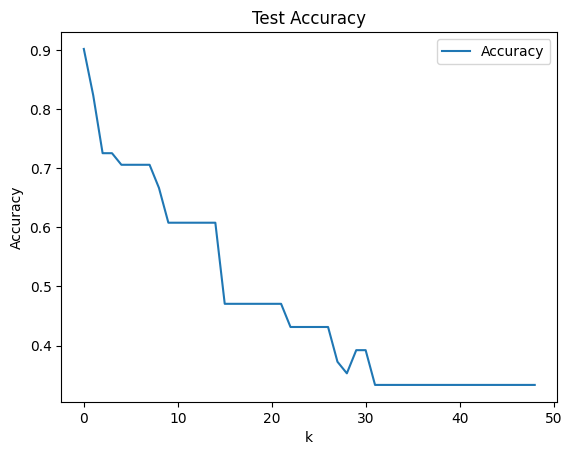

In [20]:
from sklearn.neighbors import KNeighborsClassifier

N_train = len(y_train)
N_test = len(y_test)
k_bar = N_train-1
accuracy = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    accuracy[k] = np.sum( y_hat == y_test )/N_test

accuracy_max = np.max(accuracy)
max_index = np.where(accuracy==accuracy_max)
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1
print(accuracy_max)
print(k_star)

## Accuracy plot:
plt.plot(np.arange(0,k_bar),accuracy,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

In [21]:
# Fit optimal model
model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)

## Confusion Table:
print('All variables, confusion table:', pd.crosstab(y_hat, y_test))

All variables, confusion table: class   1  2  3  4  5  6  7
row_0                      
1      17  0  1  0  0  0  0
2       0  9  0  0  0  0  0
3       0  0  1  0  0  0  0
4       0  0  1  7  0  0  0
5       0  0  1  0  3  0  0
6       0  0  0  0  0  5  2
7       0  0  0  0  0  0  4


0.6470588235294118
[ 1  2  3  4  5  6  7  8  9 10 12 13 14]


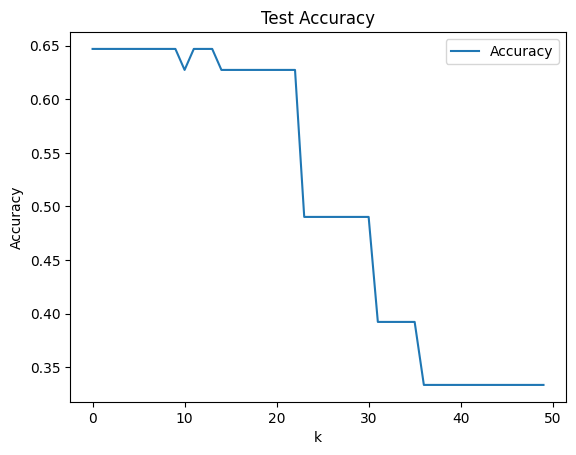

Confusion table: class   1  2  3  4  5  6  7
row_0                      
1      17  0  0  0  0  0  0
2       0  8  0  0  0  4  0
4       0  0  0  7  3  0  3
6       0  1  4  0  0  1  3
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]

In [23]:
## Select data:
x_vars = ['milk','aquatic','airborne']

y = df['class']
X = df.loc[:,x_vars]

## Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.5,random_state=125)
N_train = len(y_train)
N_test = len(y_test)

## Solve for k that maximizes accuracy:
k_bar = N_train
accuracy = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    accuracy[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

accuracy_max = np.max(accuracy) # Find highest recorded Accuracy
max_index = np.where(accuracy==accuracy_max) # Find the indices that equal the maximum
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(accuracy_max)
print(k_star)


## Accuracy plot:
plt.plot(np.arange(0,k_bar),accuracy,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = model.predict(X_test.values) # Predict values for test set

## Confusion Table:
print('Confusion table:', pd.crosstab(y_hat, y_test))

print( model.predict_proba(X_test.values) )